# Practice
Failure to see a doctor is a serious public health problem. Missed appointments cost the US healthcare system nearly [$ 200 each](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4714455/). Therefore, it should come as no surprise that reducing absenteeism has become a priority in the United States and around the world. [Numerous studies](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3962267/) have been conducted to identify the most effective means of reducing absenteeism. The first step to solving the problem is to understand why the patient is missing a scheduled appointment.

[Data](https://drive.google.com/open?id=1bvlBkt0AYFw6ZLSjB41xHLnCLkweXxXE),

A description of the data can be found at [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments)

We want to answer essentially two questions:


1. What is the profile of a person who misses scheduled visits to the doctor?
2. What factors influence a no show?

Keep this in mind. Accompany your answers with charts, do not forget to label the axes and titles, and also choose not the type of visualization that you understand how it works, but the one that is right for the task.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns

In [ ]:
df = pd.read_csv('KaggleV2-May-2016.csv')

#### Task 0
Change the no-show column to the show column to remove double negation

#### Task 1
Check data for gaps and outliers

#### Task 2
Cast columns to correct data types (at least temporary)

#### Task 3
Check age ranges (Age)

Are there any entries that seem suspicious to you?
Should these records be kept or should they be removed? Why do you think so (the description of the data on the kaggle website can help in solving this question)?

#### Task 4
Are the patients unique in our table? Are we dealing with a list of one-off appointments, or at least some of them are regular?

#### Task 5
If we have repeated visits, does the number (1st, 2nd, 3rd ...) of the reception somehow affect the turnout? Where absenteeism occurs more often, for regular visits or for one-off?

#### Task 6
Explore the effect of age on turnout

#### Task 7
For the breakdown by age, add a breakdown by gender. Maybe one gender skips receptions more often than the other? In all age groups, we can confidently compare the chance of missing (in other words, is there a bias in any of the groups towards men or women in the number of appointments)?

#### Task 8
Investigate the effect of waiting time on attendance. You can use the same approach as in task 5.

#### Task 9
In general, for the sample, does SMS affect turnout?

#### Task 10
Investigate the impact of texting on truant turnout. A truant is someone who missed an appointment at least once.

Are these conclusions correct for those patients who had more than 1 entry (> = 5 entries)?

### Task 11
Conduct a cohort analysis for customers of the online store, displaying retention (the percentage of customers in the cohort in the period 1-2-3, etc.).


Data for work can be downloaded via the [link](https://drive.google.com/file/d/1K5LLBiCZ6p_34ANiMo0rI46xMdP5ZfRT/view?usp=sharing). This is data on the sales of goods from one online store, the data contains the number of the receipt, the number of the item in the warehouse, its description, the number of items in the check line, date, price per unit, customer ID, as well as the country in which the sale took place.

In [4]:
url = 'https://drive.google.com/file/d/1K5LLBiCZ6p_34ANiMo0rI46xMdP5ZfRT/view'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
data: pd.DataFrame = pd.read_csv(path, encoding='latin1')

In [5]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# находим заказы быз ИД покупателей
lost_customers = list(data[data['CustomerID'].isna()]['InvoiceNo'].unique())
# проверяем есть ли среди этих заказов ИД покупателей (чтобы на основе них заполнить пропуски)
print(len(data[(data['InvoiceNo'].isin(lost_customers)) & (data['CustomerID'].notna())]))

0


In [8]:
# заполнить пропуски не получиться - избавляемся от них
data = data[~data['CustomerID'].isna()].reset_index(drop=True)

In [9]:
# to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# astype
data['CustomerID'] = data['CustomerID'].astype(int)

### COHORT ANALYSIS

In [13]:
# находим дату первого заказа по каждому покупателю
first_visit = data.groupby(['CustomerID'])['InvoiceDate'].min().reset_index()
first_visit.columns = ['CustomerID', 'first_visit']
first_visit.head()

,CustomerID,first_visit
0,12346,2011-01-18 10:01:00
1,12347,2010-12-07 14:57:00
2,12348,2010-12-16 19:09:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00


In [17]:
# добавляем данные по дате первой покупки
data = data.merge(first_visit)

# добавляем месяц первой покупки
data['first_visit_month'] = data['first_visit'].astype('datetime64[M]')
# добавляем месяц текущей покупки
data['visit_month'] = data['InvoiceDate'].astype('datetime64[M]')

# считаем текущую когорту (месяц текущего посещения - месяц первого посещения)
data['lifetime'] = (data['visit_month'] - data['first_visit_month']) / np.timedelta64(1, 'M')
data['lifetime'] = data['lifetime'].round().astype('int')

# группируем данные по первому месяцу посещения и по когортам, подсчитывая количество уникальных покупателей
cohort_visits = data.groupby(['first_visit_month', 'lifetime']).agg({'CustomerID': 'nunique'}).reset_index()

# фильтруем получившуюся таблицу по первой (нулевой) когорте, оставляя только данные по уникальным покупателям
f_uid = cohort_visits[cohort_visits['lifetime'] == 0][['first_visit_month', 'CustomerID']]
f_uid.columns = ['first_visit_month', 'f_CustomerID']

# соединяем первую (нулевую) когорту со всему когортами
cohort_visits = cohort_visits.merge(f_uid)

# считаем процентное соотношение по когортам (отношение вернувшихся покупателей к нулевой когорте)
cohort_visits['retention'] = cohort_visits['CustomerID'] / cohort_visits['f_CustomerID']

# строим сводную таблицу по месяцу первого посещения в разрезе когорт
visits_retention_pivot = cohort_visits.pivot_table(index='first_visit_month', 
                                                   columns='lifetime', values='retention', aggfunc='sum')

In [18]:
visits_retention_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
first_visit_month,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


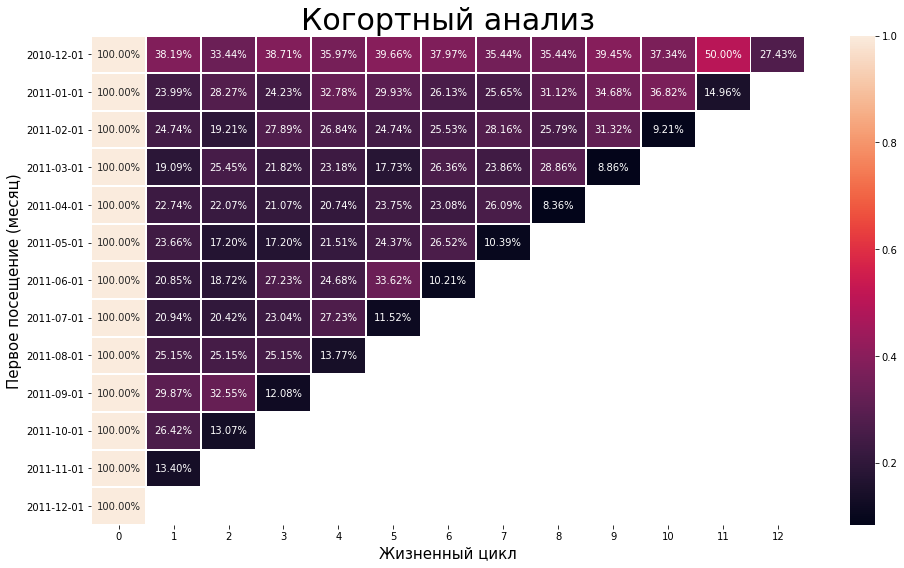

In [16]:
plt.figure(figsize = (16, 9))
plt.title('Когортный анализ', fontsize=30)
ax = sns.heatmap(visits_retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='white')
ax.set_yticklabels(visits_retention_pivot.index.date)

ax.set_ylabel('Первое посещение (месяц)', fontsize=15)
ax.set_xlabel('Жизненный цикл', fontsize=15)

plt.show()

<div class="alert alert-block alert-success">
    <h2> Промежуточный итог:</h2>

- Основная масса покупателей (около 80%) перестают пользоваться сервисом после первого месяца;
- Оставшиеся пользователи становятся +- постоянными (отток либо очень маленький либо наоборот - наблюдается приток);
- Исключение состаявляет 1-ая когорта - у неё самый маленький отток по сравнению с другими когортами, а количество действующих покупателей не падает ниже 30% (за исключением последнего месяца);
- Под Новый Год (декабрь 2011) наблюдается колоссальный отток покупателей по всем когортам (в 2.5-3 раза меньше по сравнению с предыдущим периодом);
    
</div>